<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Виды распределений ДЗ

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [79]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

In [2]:
# Основные значения:

# CRIM: Это уровень преступности на душу населения по городам
# ZN: Это доля жилой земли, зонированной для участков более 25 000 кв. Футов.
# INDUS: Это доля не торговых площадей в каждом городе.
# CHAS: ЧАС: Это фиктивная переменная реки Чарльз 
#        (она равна 1, если тракт ограничивает реку; 0 в противном случае)
# NOX: это концентрация оксидов азота (частей на 10 миллионов)
# RM: это среднее количество комнат на одно жилище
# AGE: Это доля занятых владельцем единиц, построенных до 1940 года
# DIS: Это взвешенные расстояния до пяти бостонских центров занятости
# RAD: This is the index of accessibility to radial highways
# TAX: This is the full-value property-tax rate per 10,000 dollars
# PTRATIO: This is the pupil-teacher ratio by town
# B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
# LSTAT: This is the percentage lower status of the population
# MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [3]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?

некоторые графики похожи, но это требует конкретного обоснования:
1.   Нормальное (RM)
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное (CRIM,DIS)

CRIM


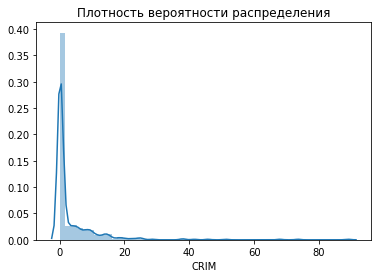

ZN


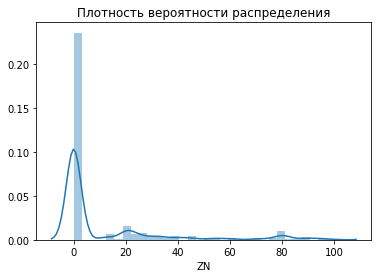

INDUS


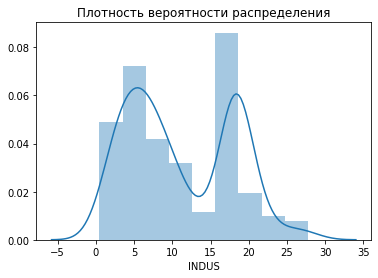

CHAS


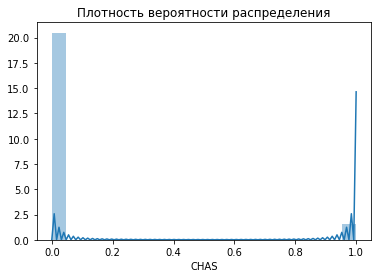

NOX


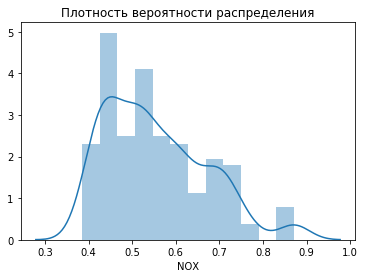

RM


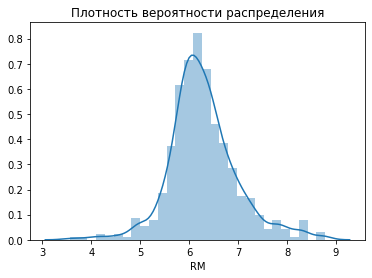

AGE


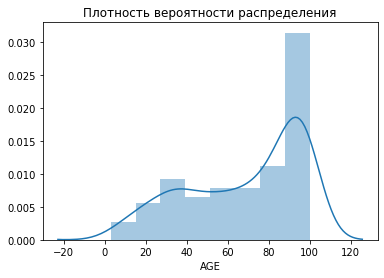

DIS


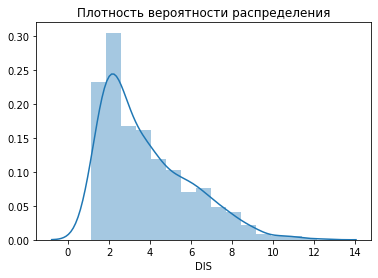

RAD


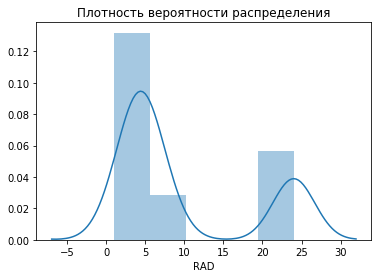

TAX


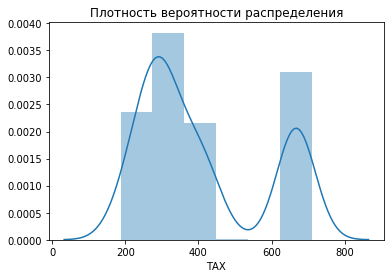

PTRATIO


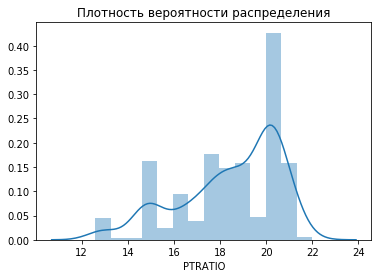

B


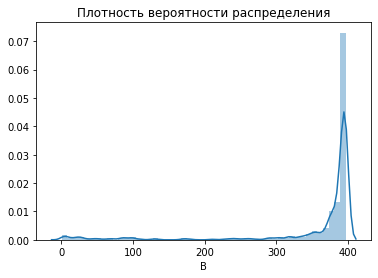

LSTAT


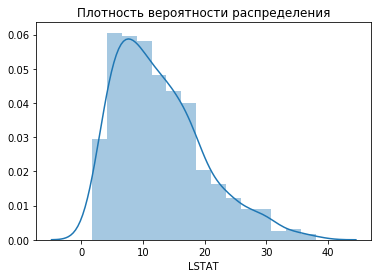

In [8]:
for i in range(13):
    c = data[names[i]]
    print(names[i])
    sns.distplot(c)
    plt.title('Плотность вероятности распределения')
    plt.show()

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 

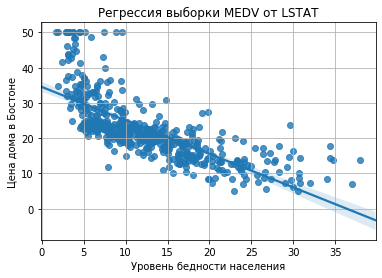

In [44]:
medv = data['MEDV']
lstat = data['LSTAT']
sns.regplot(x= lstat, y=medv ,data=data, fit_reg=True)
plt.xlabel('Уровень бедности населения')
plt.ylabel('Цена дома в Бостоне')
plt.title('Регрессия выборки MEDV от LSTAT')
plt.grid(True)
plt.show()



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [45]:
# Для sklearn сделаем reshape(-1,1) и преобразуем Series данные в numpy array

medv = np.array(medv).reshape(-1,1)
lstat = np.array(lstat).reshape(-1,1)

In [46]:
# Линейная регрессия строится на том основании, что две переменные имеют линейную зависимость.

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [47]:
# Разделим на 80% тренировочных и на 20% тестовых

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    lstat,
    medv,
    test_size = 0.2,
    random_state = 3
)

In [48]:
# Обучим модель

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# Посмотрим предсказания модели на тестируемых данных

predicted_y = model.predict(X_test)

In [50]:
#  Посчитаем ошибку модели

model.score(X_test, y_test)

0.5690773142169758

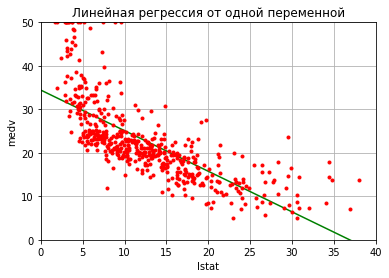

In [51]:
#  Построим график линейной регресии

plt.xlabel('lstat')
plt.ylabel('medv')
plt.title('Линейная регрессия от одной переменной')
# Построим прямую для регрессии
# Создадим 100 точек для предсказаний
x = np.linspace(-50, 200, 100)
# Посчитаем предсказанные значения
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y,'g')
plt.plot(lstat,medv, 'r.')
plt.xlim(0,40)
plt.ylim(0,50)
plt.grid(True)
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [264]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [167]:
# удалим str столбец 'Country (region)'

X=data.iloc[:,1:]
X.head()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [169]:
#Посчитаем матрицу ковариаций данных без столбца 'Country (region)'с помощью метода numpy.cov()
np.set_printoptions(precision=2,suppress=True)
np.cov(X)

array([[ 289.79,  119.77,   44.33, ...,  125.13,  -88.18, -177.64],
       [ 119.77,   90.9 ,   60.89, ...,  -29.02,  -12.04,    6.42],
       [  44.33,   60.89,   62.89, ...,  -10.  ,    8.56,   -0.78],
       ...,
       [ 125.13,  -29.02,  -10.  , ..., 1479.6 ,  294.2 ,   -3.29],
       [ -88.18,  -12.04,    8.56, ...,  294.2 ,  280.62,  365.53],
       [-177.64,    6.42,   -0.78, ...,   -3.29,  365.53, 1024.49]])

In [170]:
print(np.shape(np.cov(X)))

(156, 156)


In [171]:
np.round_(np.cov(X.T), decimals=1)

array([[2041. , 1100.8,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan],
       [1100.8, 2041. ,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan],
       [   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan],
       [   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan],
       [   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan],
       [   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan],
       [   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan],
       [   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan],
       [   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan],
       [   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan]])

In [172]:
print(np.shape(np.cov(X.T)))

(10, 10)


Сколько в данной таблице отсутствующих значений? Написать ответ.
ОТВЕТ - (10X10)-(2x2)=96 так получилось - использовали методы np.
хотя можно было из данных убрать строчки с nan, тогда cov была бы заполненной
Если есть отсутствующие значения в выборке country, убрать (drop). 
ОТВЕТ - В столбце Country (region) отсутствующих значений нет - country.isnull().sum()=0.
Написать код.

In [182]:
# а если использовать DF.cov() метод Pandas, и отбросив дробную часть - получится красивее))))

round(X.cov())

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,2041.0,1101.0,996.0,1061.0,1657.0,1108.0,371.0,1009.0,1615.0,1613.0
SD of Ladder,1101.0,2041.0,174.0,1260.0,1220.0,512.0,507.0,798.0,1255.0,1208.0
Positive affect,996.0,174.0,2015.0,785.0,778.0,1374.0,405.0,715.0,586.0,648.0
Negative affect,1061.0,1260.0,785.0,2015.0,1253.0,867.0,309.0,682.0,1051.0,945.0
Social support,1657.0,1220.0,778.0,1253.0,2015.0,905.0,231.0,892.0,1509.0,1472.0
Freedom,1108.0,512.0,1374.0,867.0,905.0,2015.0,736.0,987.0,801.0,821.0
Corruption,371.0,507.0,405.0,309.0,231.0,736.0,1838.0,511.0,368.0,233.0
Generosity,1009.0,798.0,715.0,682.0,892.0,987.0,511.0,2015.0,949.0,836.0
Log of GDP\nper capita,1615.0,1255.0,586.0,1051.0,1509.0,801.0,368.0,949.0,1938.0,1614.0
Healthy life\nexpectancy,1613.0,1208.0,648.0,945.0,1472.0,821.0,233.0,836.0,1614.0,1888.0


In [158]:
len(data)

156

In [159]:
# сколько в данной выборке (в данной таблице - data) отсутствует значений?
print(data.isnull().sum().sum())

23


In [160]:
# a в выборке country отсутствующих значений нет
country = data['Country (region)']
print(country.isnull().sum())

0


Сколько стран в выборке? Написать ответ. 

In [75]:
len(country.unique())

156

Добавить новую колонку в таблицу - 'continent'. Каждая страна относится к определенному материку. Всего материко 6:
*   Евразия,
*   Африка,
*   Северная Америка,
*   Южная Америка,
*   Австралия,
*   Антарктида.

Таким образом, мы можем классифицировать каждый элемент как член определенного класса - континента. 

In [207]:
urlo = "continents.csv"
d_continent = pd.read_csv(urlo, delimiter=';')
d_continent.head()

,Country,Continent
0,Mauritius,Africa
1,Libya,Africa
2,Nigeria,Africa
3,Algeria,Africa
4,Morocco,Africa


In [211]:
len(d_continent)

156

In [214]:
# объединение двух датафреймов - d_continent и data
data_con = d_continent.merge(data, left_on = 'Country', right_on = 'Country (region)')
data_con.head()

,Country,Continent,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Mauritius,Africa,Mauritius,57,94,55.0,16.0,54.0,40.0,96.0,37.0,53.0,73.0
1,Libya,Africa,Libya,72,115,85.0,137.0,73.0,79.0,31.0,87.0,63.0,96.0
2,Nigeria,Africa,Nigeria,85,130,61.0,55.0,111.0,75.0,114.0,59.0,107.0,145.0
3,Algeria,Africa,Algeria,88,56,113.0,106.0,101.0,149.0,46.0,128.0,72.0,78.0
4,Morocco,Africa,Morocco,89,101,110.0,91.0,139.0,76.0,84.0,154.0,98.0,79.0


Нарисовать sns.pairplot для класса - континет. Из графика сделать вывод о том, какие континеты похожи (continent) 

ОТВЕТ - по некоторым параметрам похожи:
Северная и Южная Америка, 
Африка и Евразия

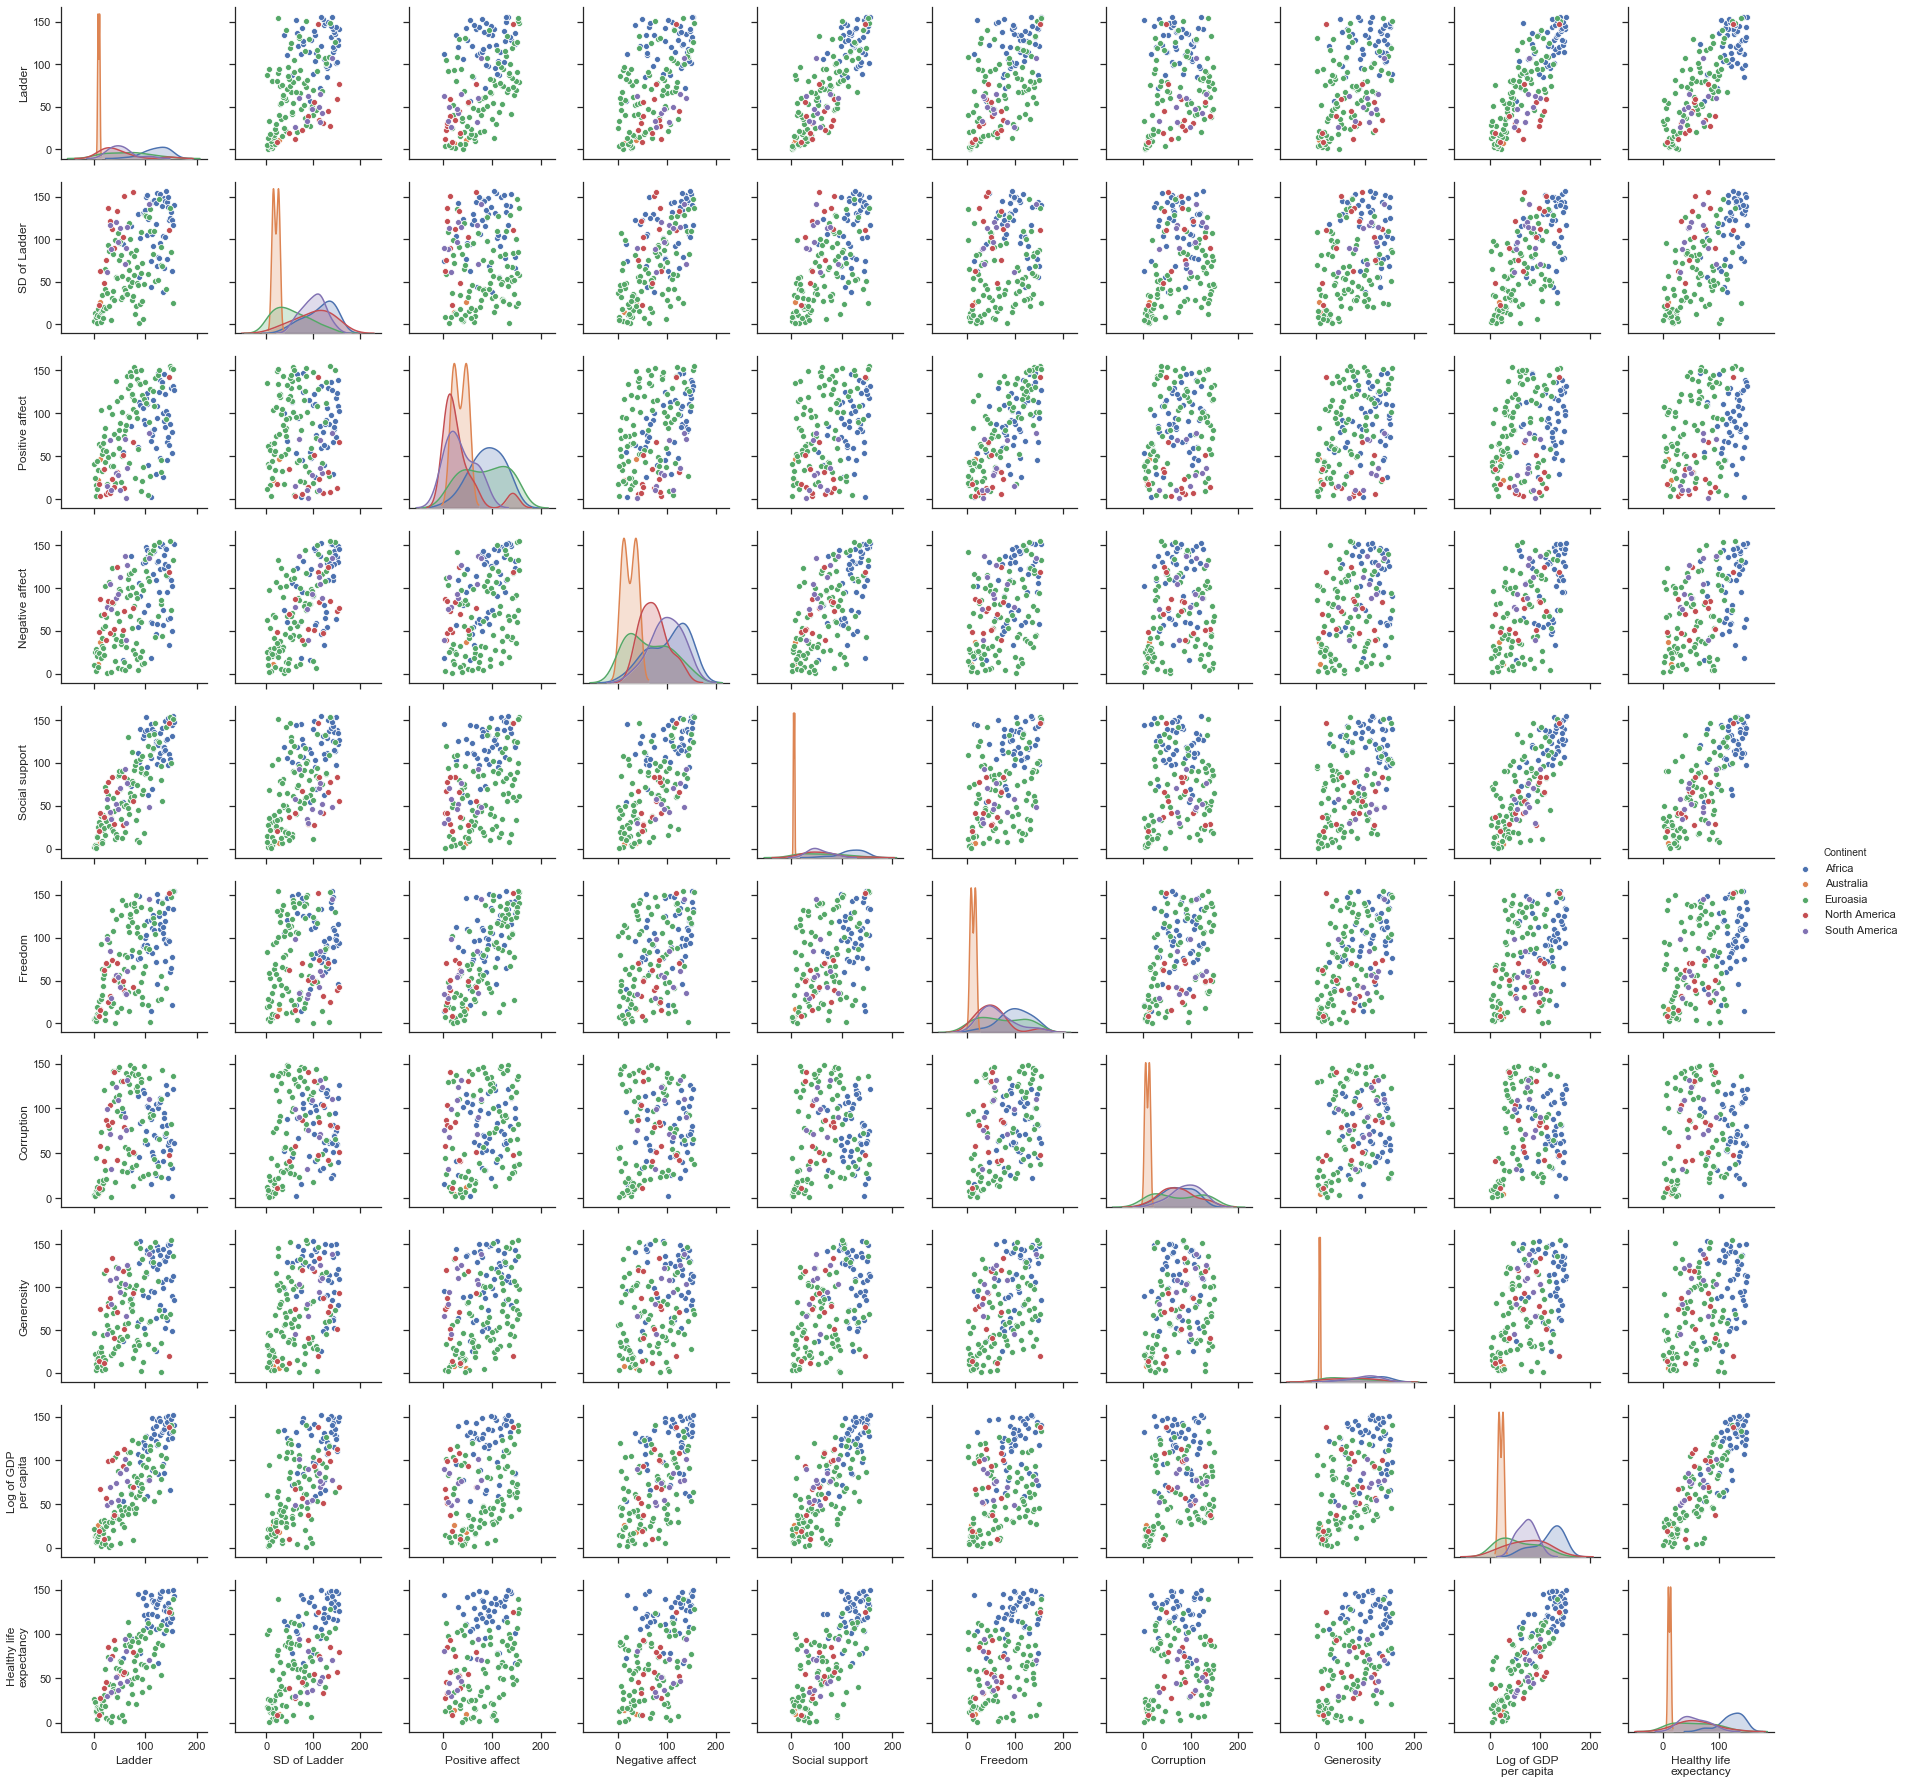

In [217]:
# пример кода на точечный график по континентам
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data_con, hue='Continent')
plt.show()

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

ОТВЕТ - корр матрица отражает все закономерности ковариационной, построенной выше 

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? Сделать график регрессионной прямой на данных и собственных векторов. 

In [244]:
# удалим  строку c nan (оставим те строки, в которых Ladder не равен 29)
data = data.loc[data['Ladder'] != 29, :]
data = data.loc[data['Generosity'] != 29, :]

[[  1.  47.]
 [  2.  22.]
 [  3.  11.]
 ...
 [154. 137.]
 [155. 113.]
 [156.  85.]]
[3030.73 1023.8 ]
[[ 0.71 -0.7 ]
 [ 0.7   0.71]]
Собственное значение:  3030.73 Собственный вектор:  [0.71 0.7 ]


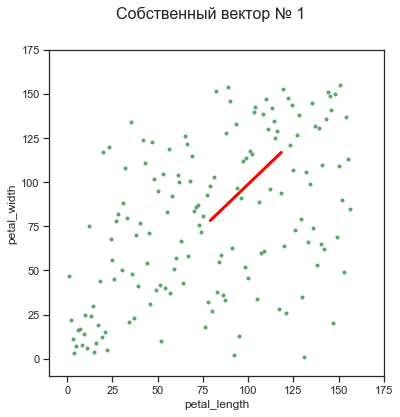

Собственное значение:  1023.8 Собственный вектор:  [-0.7   0.71]


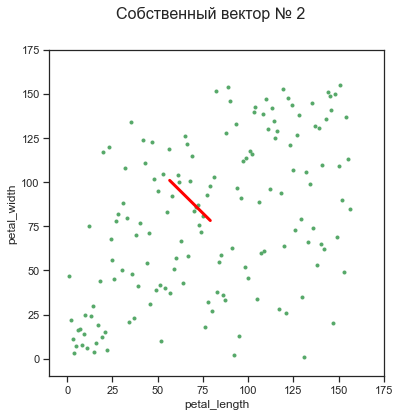

In [248]:
import numpy.linalg as la
import math
from sklearn.preprocessing import StandardScaler

petal_length = data['Ladder']
petal_width = data['Generosity']

Y = np.vstack((petal_length, petal_width)).T
w,v = la.eig(np.cov(Y.T))
print(Y)
print(w)
print(v)
for i in range(len(w)):
    fig = plt.gcf()
    fig.set_size_inches(6,6)
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(petal_length, petal_width, 'g.', zorder=1)
    print('Собственное значение: ', round(w[i],2), 'Собственный вектор: ', v[:,i])
    plt.xlabel('petal_length')
    plt.xlim(-10,175)
    plt.ylabel('petal_width')
    plt.ylim(-10,175)
    plt.plot([petal_length.mean(), petal_length.mean() + math.sqrt(w[i]) * v[:,i][0]], 
             [petal_width.mean(), petal_width.mean() + math.sqrt(w[i]) * v[:,i][1]],color='red', linewidth=3)
    plt.show()

Собственные вектора показывают, в каком направлении перекошена корреляция выборки. Первый собственный вектор показывает направление, в котором максимальный перекос. Второй собственный вектор - направлении с меньшим перекосом. Второй собственный вектор также перпендикулярен первому собственному вектору. 

Ниже представлен пример проецирования точек нашей выборки на прямую, заданную собственным вектором : 
v = np.array([0.71,0.7])

[[  1.  47.]
 [  2.  22.]
 [  3.  11.]
 ...
 [154. 137.]
 [155. 113.]
 [156.  85.]]


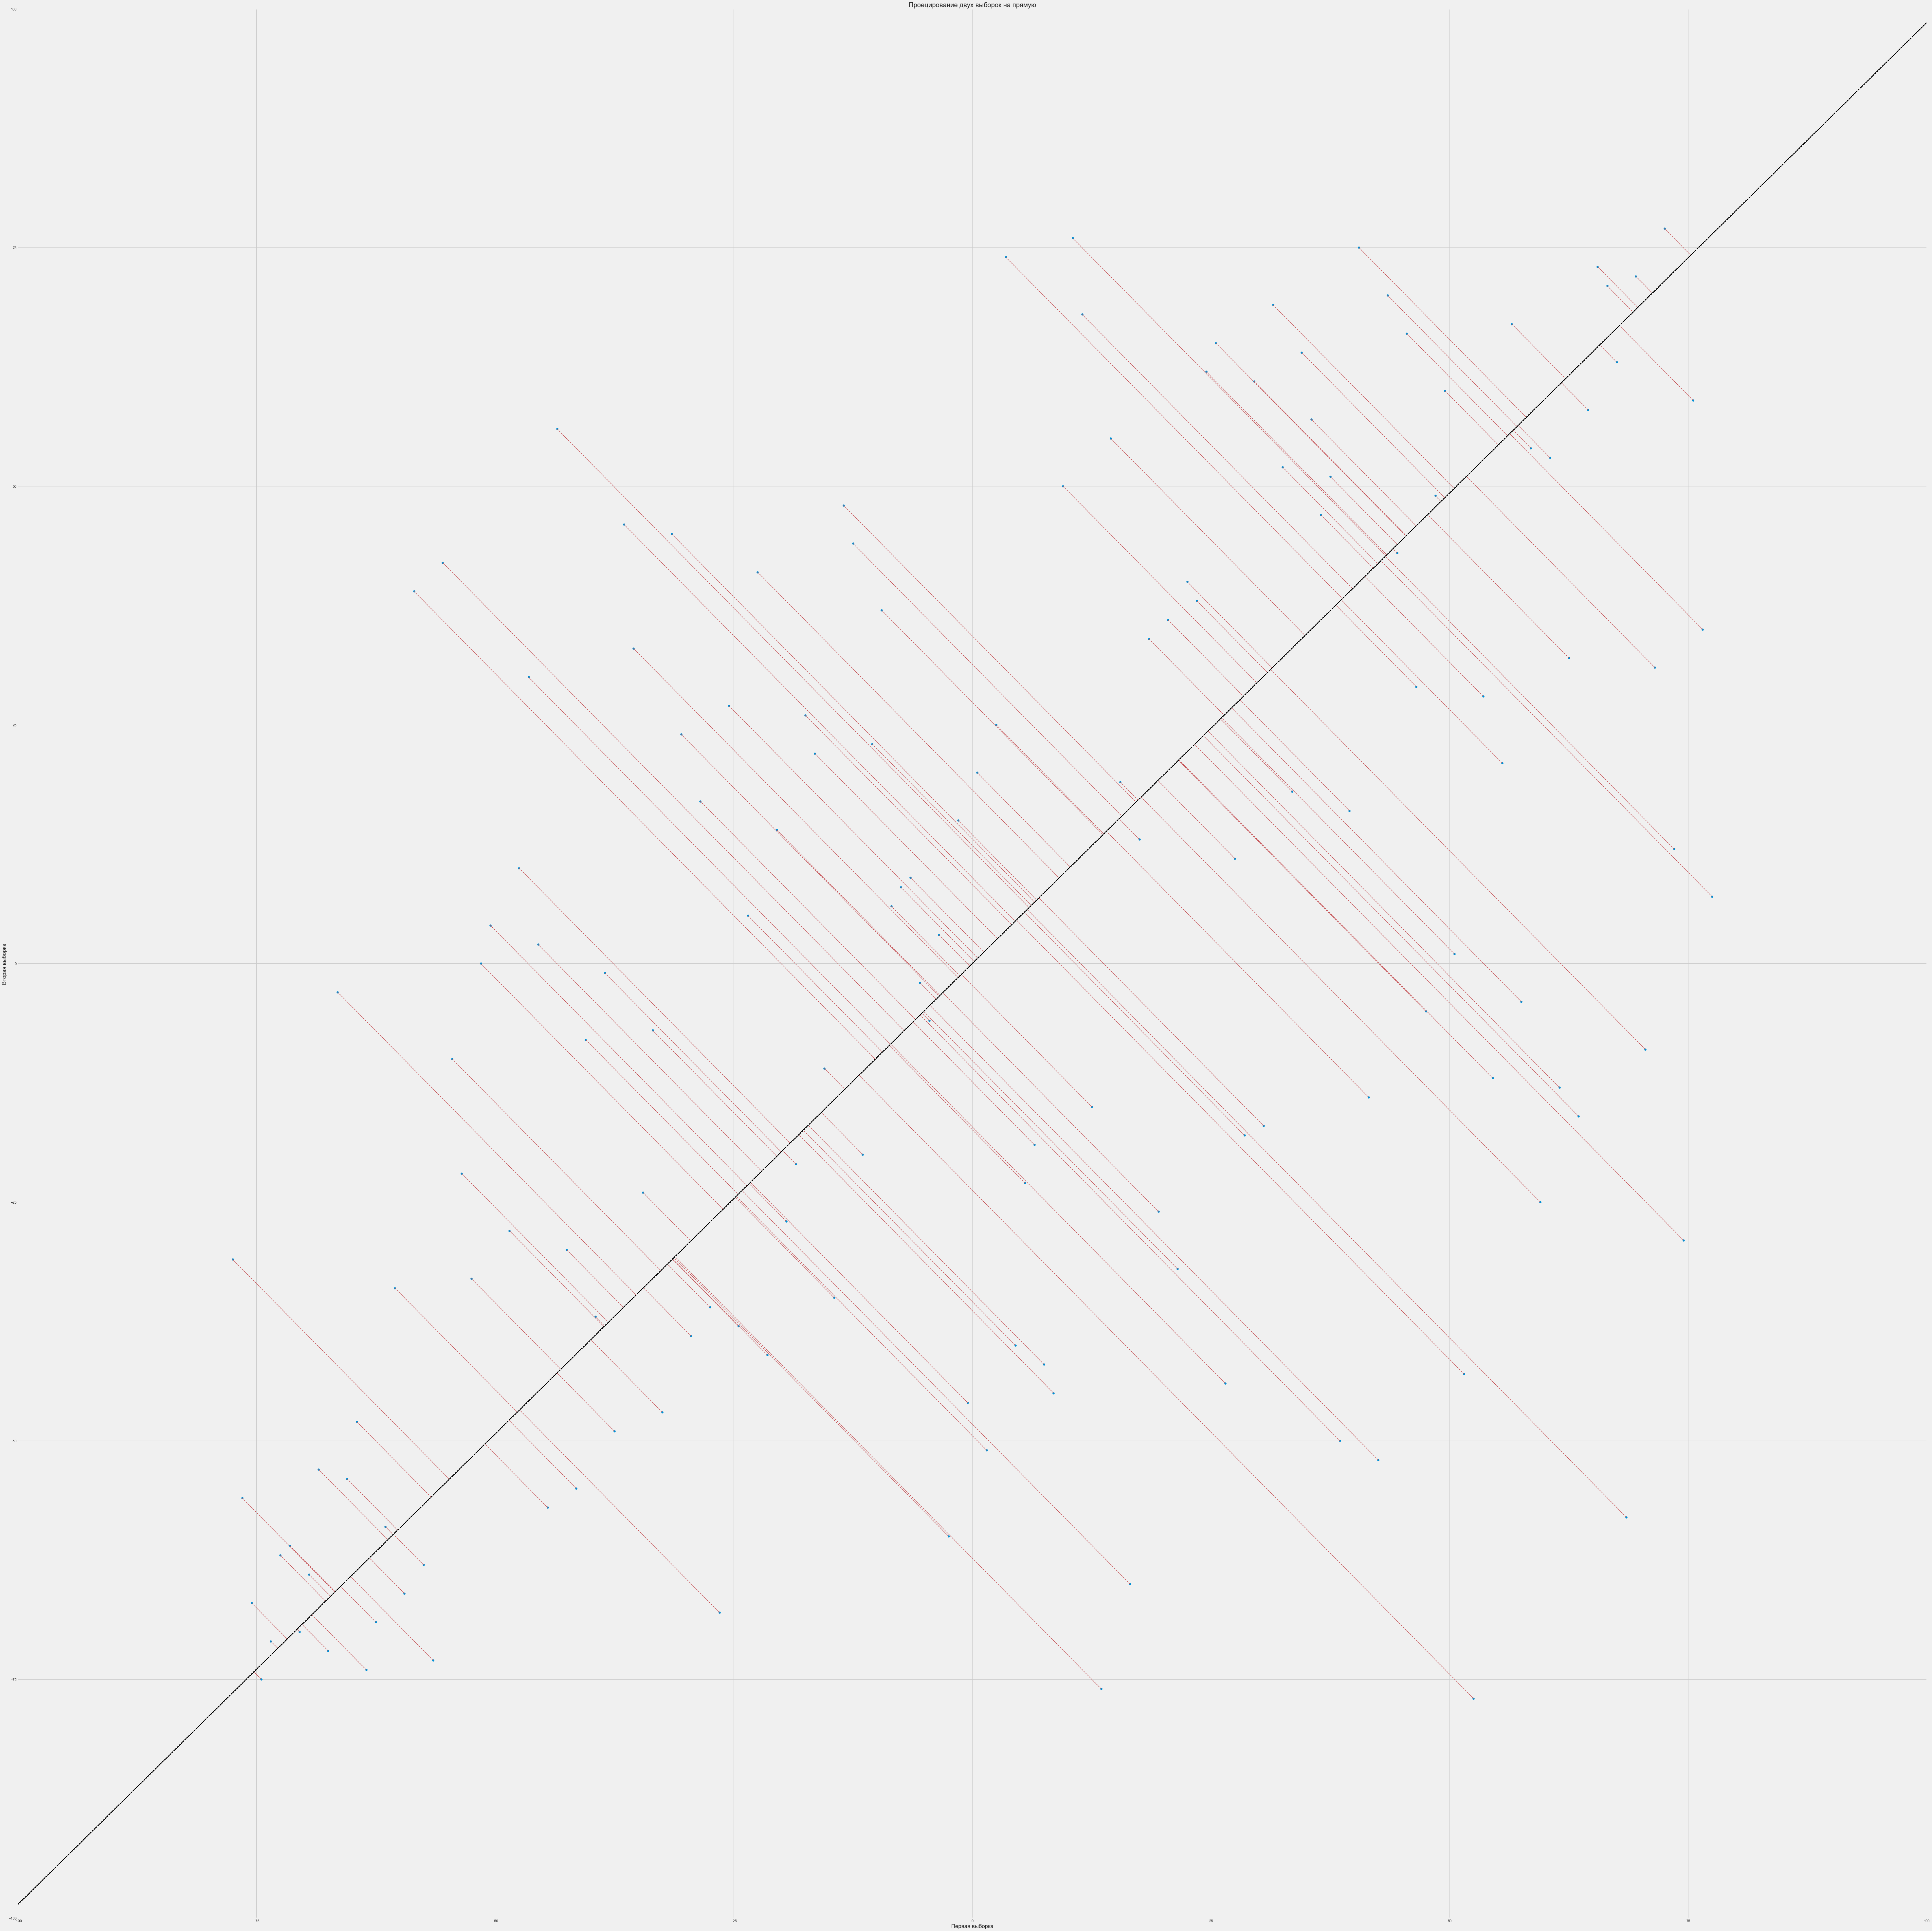

In [271]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.preprocessing import StandardScaler
import sys

A=data[['Ladder','Generosity']].values
print(A)

# Нормализуем данные
A = StandardScaler(with_std=False,copy=False).fit_transform(A)
fig = plt.figure(figsize=(100,100))
ax0 = fig.add_subplot(111)
ax0.set_aspect('equal')
ax0.set_xlim((-100,100))
ax0.set_ylim((-100,100))
ax0.scatter(A[:,0],A[:,1])

for i in range(len(A[:,0])):

    # строим прямую v
    v = np.array([0.71,0.7])
    ax0.plot(np.linspace(-100,100),np.linspace(-100,100)*(v[1]/v[0]),color='black',linestyle='--',linewidth=1.5)   
    # 2 выборки заданы в векторе A. Построим точку w из текущего значения двух выборок
    w = np.array([A[i][0],A[i][1]])
    # строим проекцию данной точки w на вектор v: cv
    cv = 0 + (np.dot(w,v))/np.dot(v,np.transpose(v))*v
    # линия между v и cv
    ax0.plot([w[0],cv[0]],[w[1],cv[1]],'r--',linewidth=1.5)
    # проверить результат
#    print(np.dot((w-cv),cv))
plt.xlabel('Первая выборка')
plt.ylabel('Вторая выборка')
plt.title('Проецирование двух выборок на первый собственный вектор')
plt.show()

При **проецировании** всех точек на первый собственный вектор разброс данных получается максимальным

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

ОТВЕТ - Диаграмма даже для 10 испытаний приближается к  равномерному законку распределения

Результаты подбрасывания кубика -  [5 6 1 4 4 4 2 4 6 3]


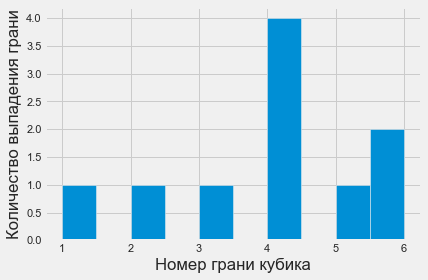

In [369]:
n_br = 10 # количество подбрасываний кубика в серии
rng = np.random.RandomState(0)
# rng - для выдачи одних и тех же сл значений 
# начало моделирования
cub_flips = rng.randint(1, 7, size=n_br) # список длины n_br
# cub_flips - выборка из n_br = 10 подбрасываний
print('Результаты подбрасывания кубика - ', cub_flips)
plt.hist(cub_flips)
plt.xlabel('Номер грани кубика')
plt.ylabel('Количество выпадения грани')
plt.show()

Результаты подбрасывания кубика -  [3 5 5 6 3 1 4 4 3 6 5 2 6 5 3 6 1 3 4 4 2 5 2 1 5 5 2 1 3 4 6 4 5 1 6 4 2 5 6 3 4 3 3 6 1 2 5 2 3 3 3 2 6 3 3 4 5 4 5 5 1 2 3 4 5 4 4 5 3 3 1 1 1 1 4 1 4 1 3 5 5 2 4 4 6 1 6 6 2 6 4 3 2 2 2 6 6 4 1 1]


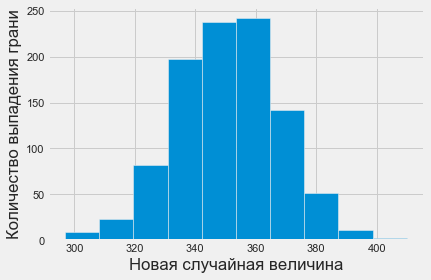

In [375]:
n_experiments = 1000 # количество экспериментов по серии подбрасываний кубика
n_br = 100 # количество подбрасываний кубика в серии

rng = np.random.RandomState(0)
# rng - для выдачи одних и тех же сл значений (нарпр. при отладке алгоритма)

outcomes = np.empty(n_experiments, dtype=np.float)
# определяем новый массив заданной формы и типа без инициированных данных

for i in range(n_experiments): # начало моделирования
    cub_flips = rng.randint(1, 7, size=n_br) # список длины n_br
    # cub_flips - выборка n_br = 100 подбрасываний
    head_counts = np.sum(cub_flips)
    outcomes[i] = head_counts

print('Результаты подбрасывания кубика - ', cub_flips)
plt.hist(outcomes)
plt.xlabel('Новая случайная величина')
plt.ylabel('Количество выпадения грани')
plt.show()

В данном случае применима Центра́льные преде́льные теоре́мы — класс теорем в теории вероятностей, утверждающих, что сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы (ни одно из слагаемых не доминирует, не вносит в сумму определяющего вклада), имеет распределение, близкое к нормальному.

ОТВЕТ - Мы построили гистограмму плотности распределения суммы 100 случайных величин равномерно распределенных. 
В наших 1000 испытаниях случайная величина - это сумма 100 случайных величин (новая случайная величина).
Поэтому (в силу ЦПТ) распределение близко к нормальному.